In [4]:
from constructor_standings import ergast_retrieve, get_constructor_rankings
from driver_comparisons import get_session, driver_gear_changes, driver_speed_change, double_driver_lap_comparison, fastest_laptimes, fastest_lap_comparison
from static_plot import static_track_conditions, static_track_temp

In [5]:
ergast_retrieve



<function constructor_standings.ergast_retrieve(api_endpoint: str)>

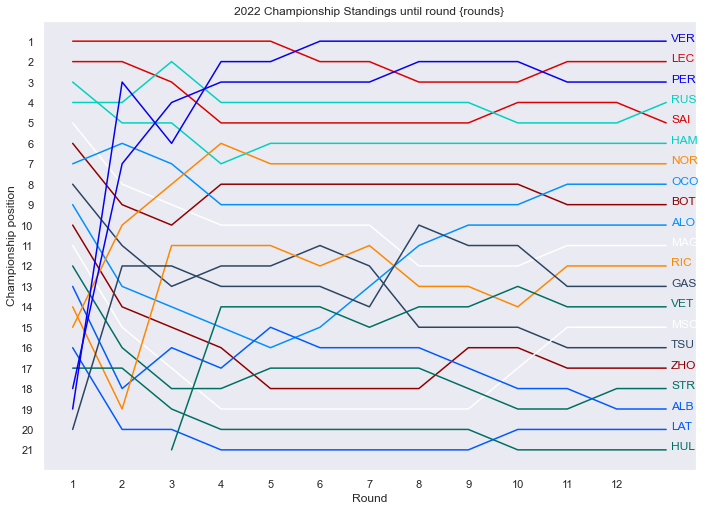

In [6]:
get_constructor_rankings()

In [7]:
hungary_practice_3 = get_session(2022, "Hungary GP", "FP3")

core           INFO 	Loading data for Hungarian Grand Prix - Practice 3 [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [8]:
hungary_practice_3.laps.pick_fastest()

Time                      0 days 01:15:36.266000
DriverNumber                                   6
LapTime                   0 days 00:01:41.480000
LapNumber                                     16
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:33.683000
Sector2Time               0 days 00:00:38.759000
Sector3Time               0 days 00:00:29.038000
Sector1SessionTime        0 days 01:14:28.469000
Sector2SessionTime        0 days 01:15:07.228000
Sector3SessionTime        0 days 01:15:36.266000
SpeedI1                                    245.0
SpeedI2                                    207.0
SpeedFL                                    236.0
SpeedST                                    285.0
IsPersonalBest                              True
Compound                            INTERMEDIATE
TyreLife                                     8.0
FreshTyre           

['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


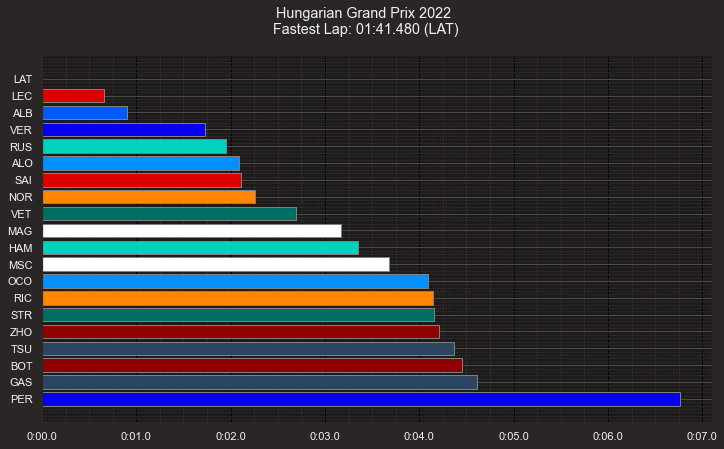

In [9]:
fastest_laptimes(hungary_practice_3)

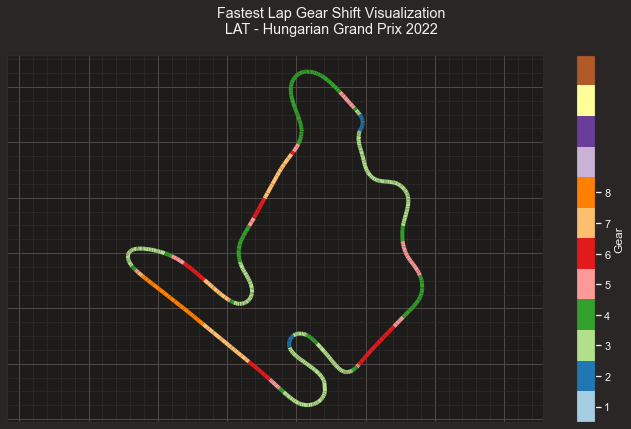

In [10]:
driver_gear_changes("LAT", hungary_practice_3)

Same Team Color


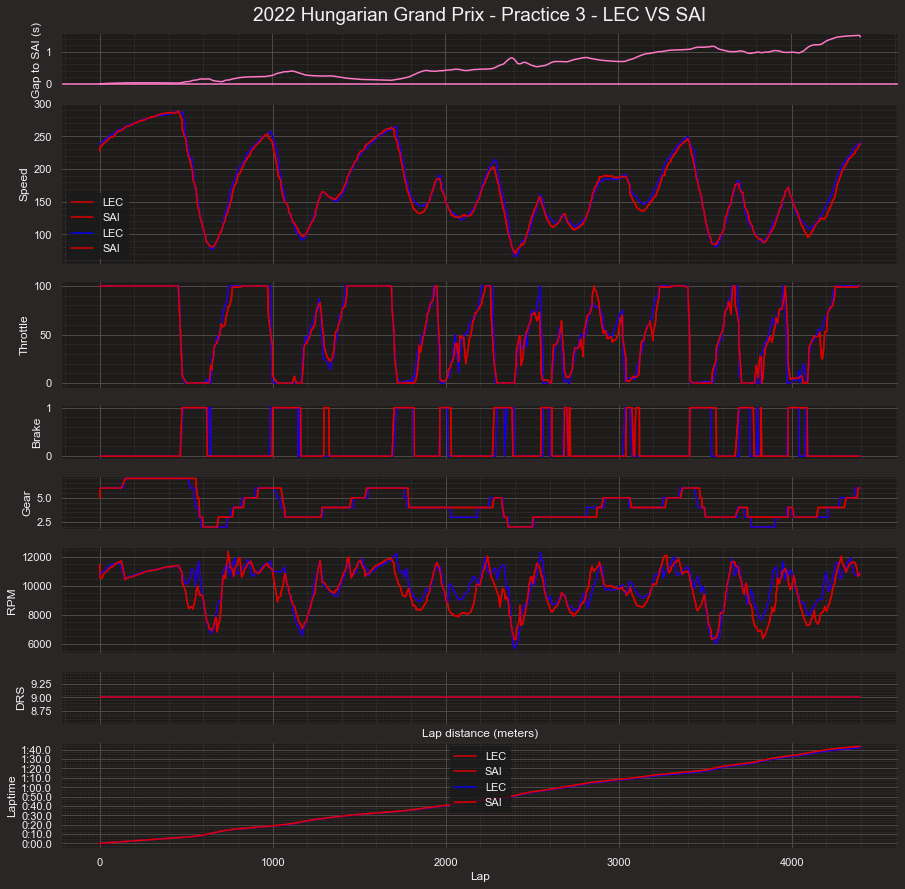

In [11]:
double_driver_lap_comparison("LEC","SAI", hungary_practice_3)

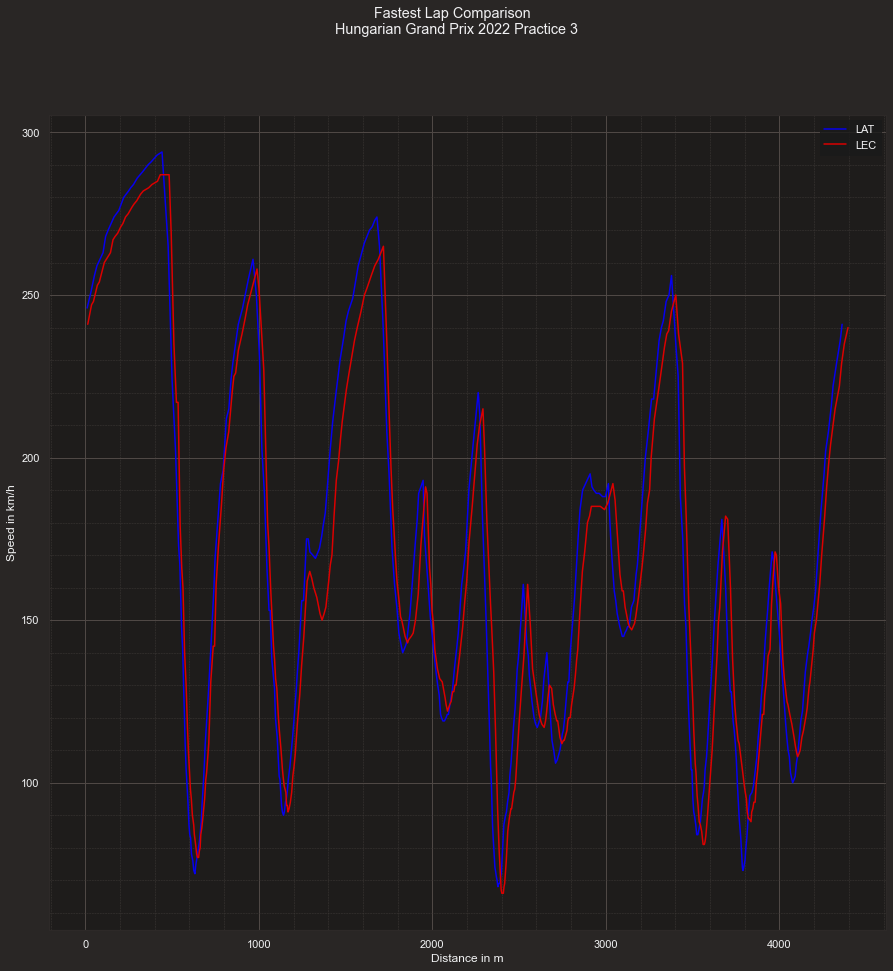

In [12]:
fastest_lap_comparison("LAT", "LEC", hungary_practice_3)

In [13]:
hungary_race = get_session(2022, "Hungary GP", "R")


core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


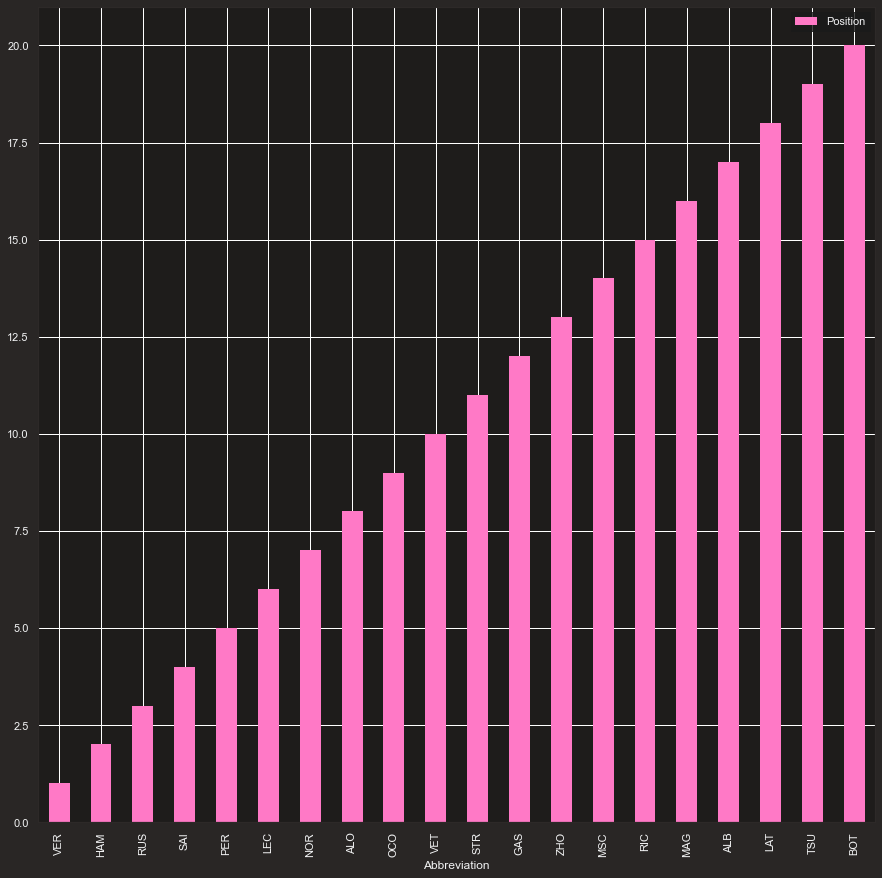

In [36]:
my_df = hungary_race.results
drivers = hungary_race.results[["Abbreviation"]]
position = hungary_race.results[["Position"]]

import matplotlib.pyplot as pls 
my_df.plot(x="Abbreviation", y="Position", kind='bar') 
plt.show()


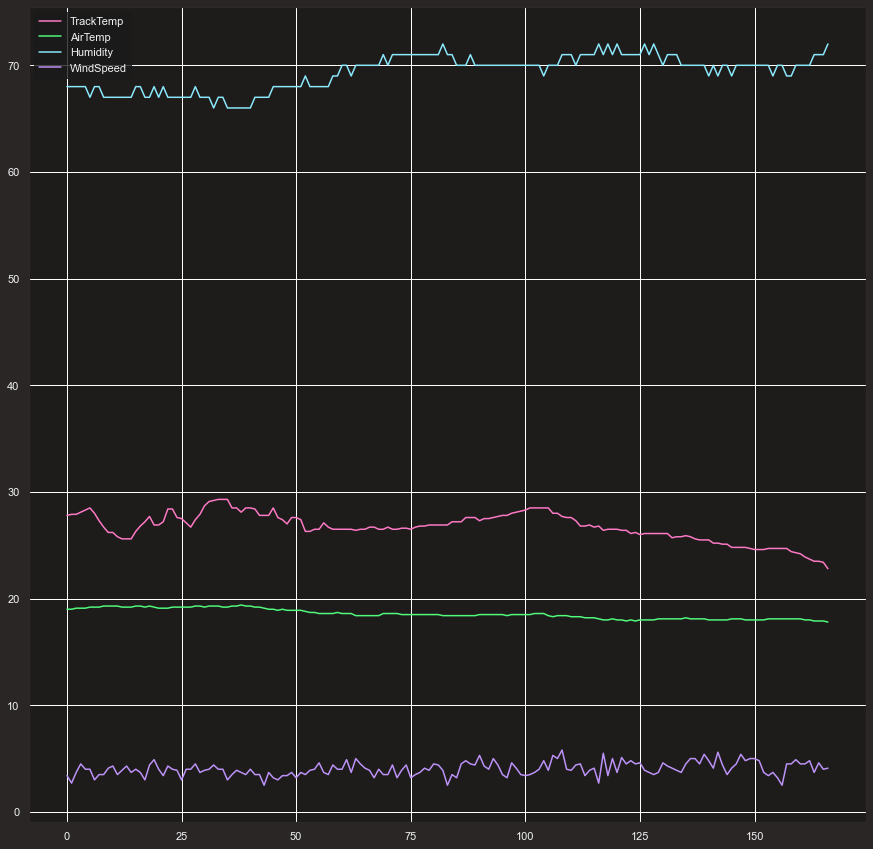

In [14]:
static_track_conditions(hungary_race)

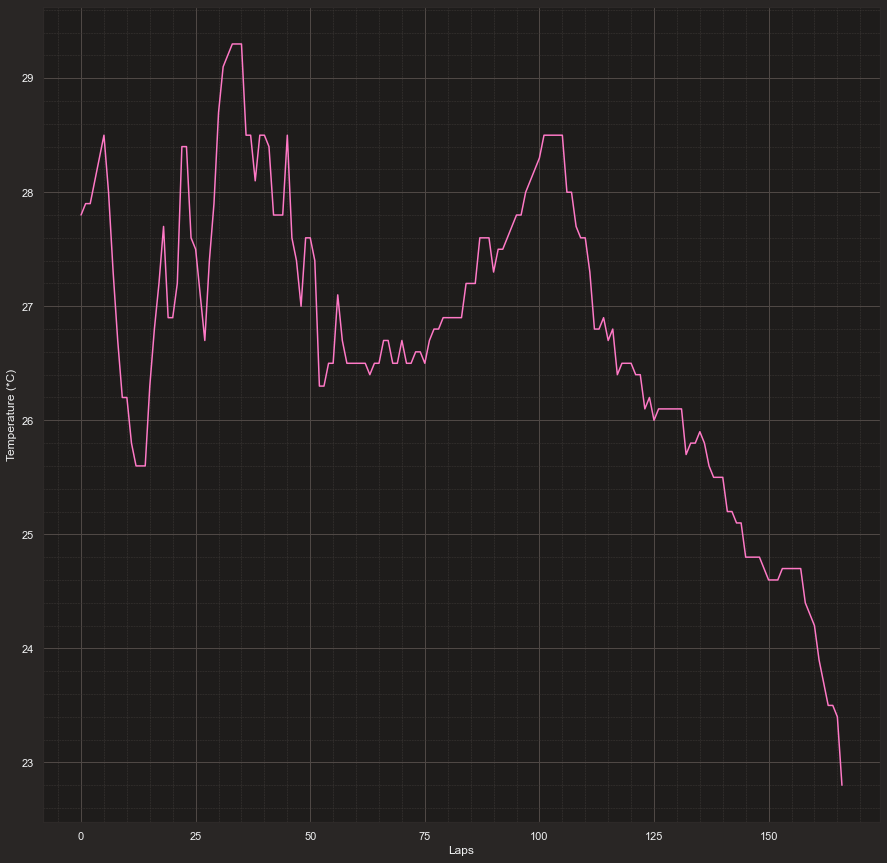

In [15]:
static_track_temp(hungary_race)

['VER' 'HAM' 'RUS' 'SAI' 'PER' 'LEC' 'NOR' 'ALO' 'OCO' 'VET' 'STR' 'GAS'
 'ZHO' 'MSC' 'RIC' 'MAG' 'ALB' 'LAT' 'TSU' 'BOT']


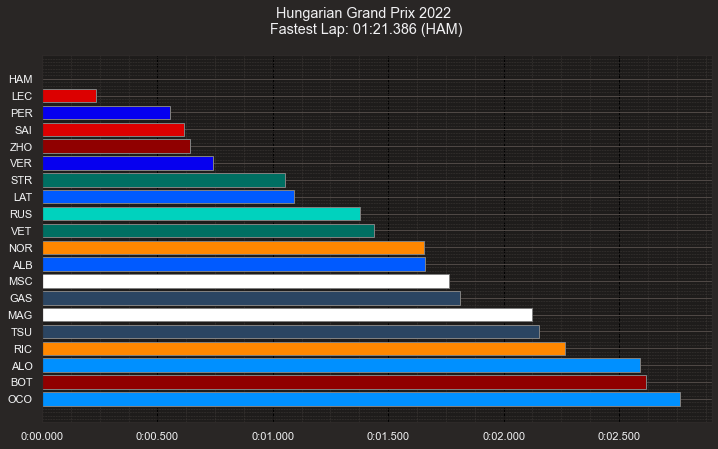

In [16]:
fastest_laptimes(hungary_race)

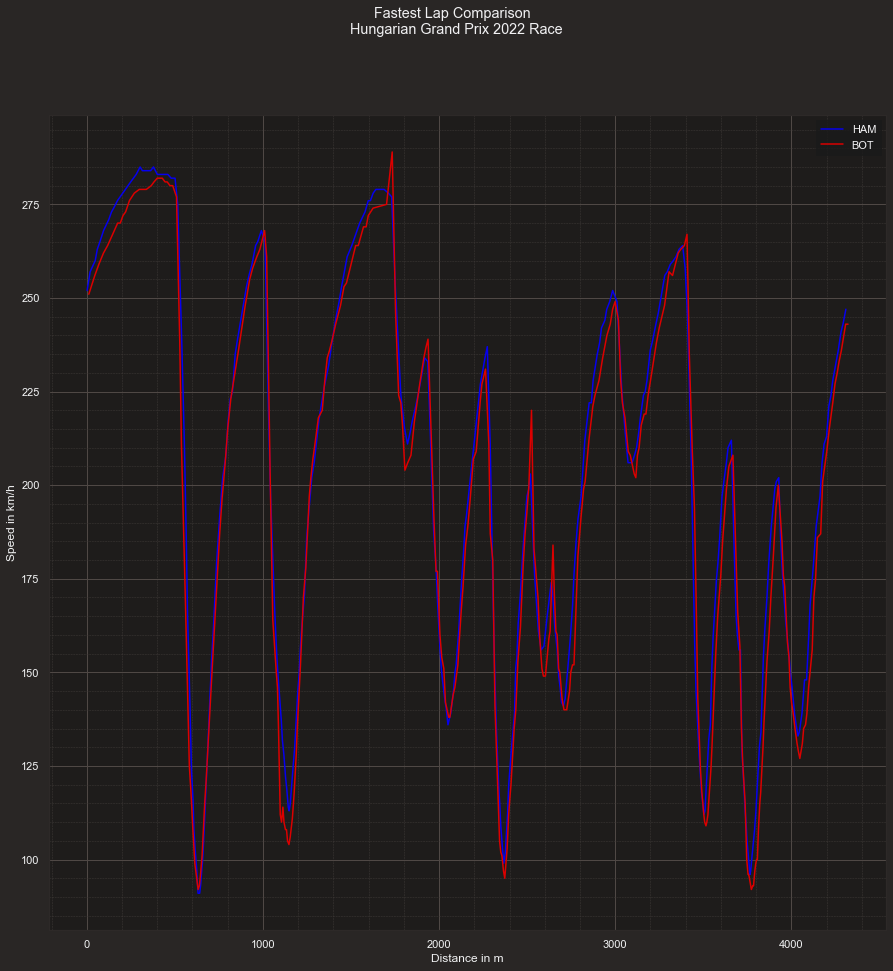

In [17]:
fastest_lap_comparison("HAM","BOT", hungary_race)

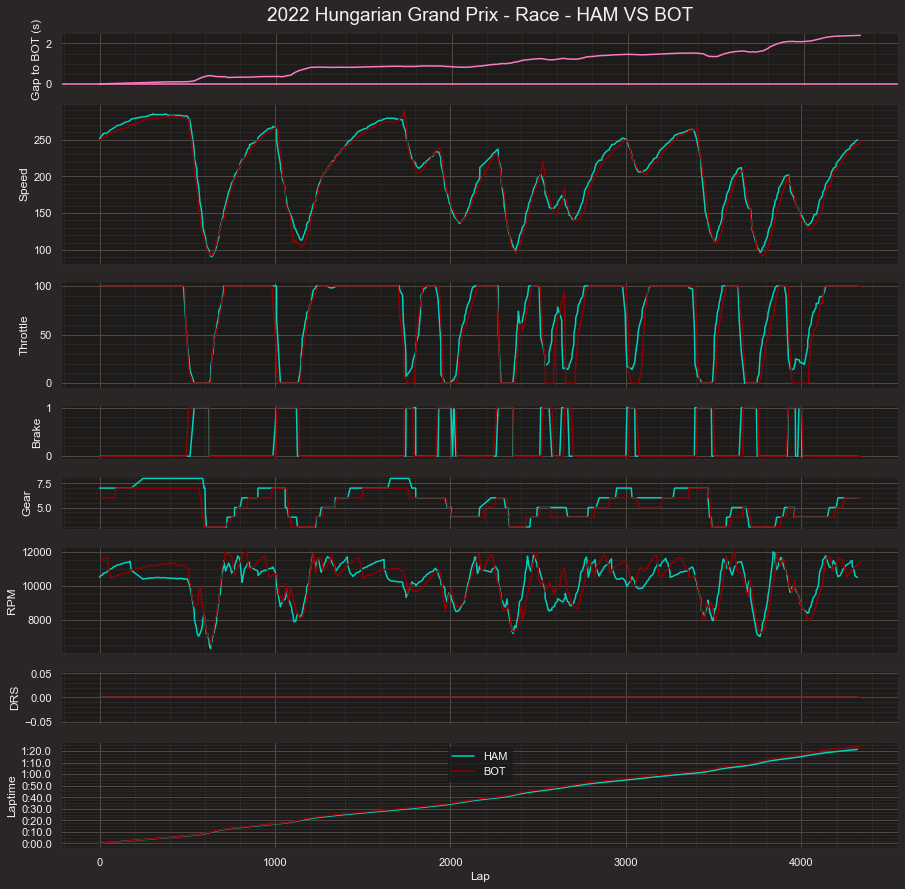

In [18]:
double_driver_lap_comparison("HAM","BOT", hungary_race)

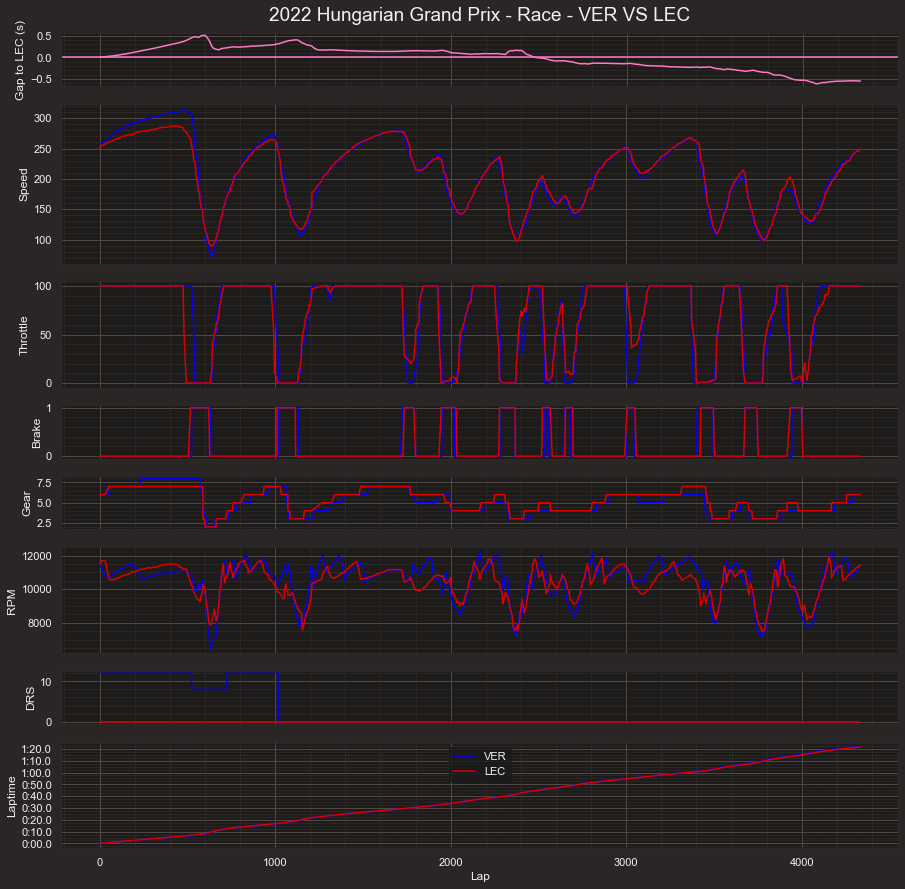

In [21]:
double_driver_lap_comparison("VER", "LEC", hungary_race)

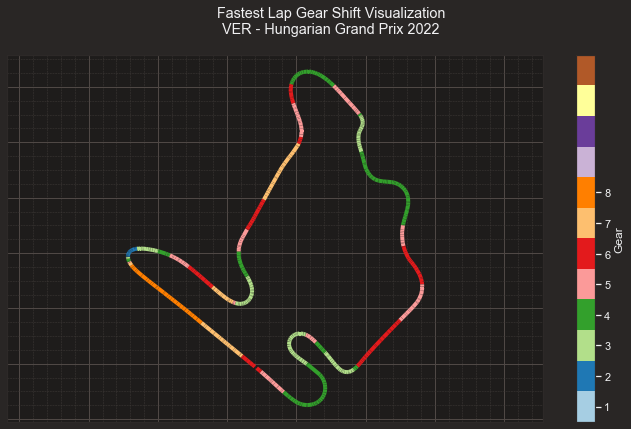

In [23]:
driver_gear_changes("VER", hungary_race)

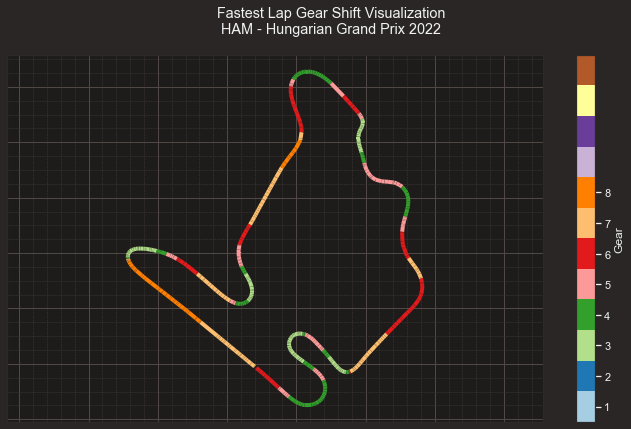

In [25]:
driver_gear_changes("HAM", hungary_race)

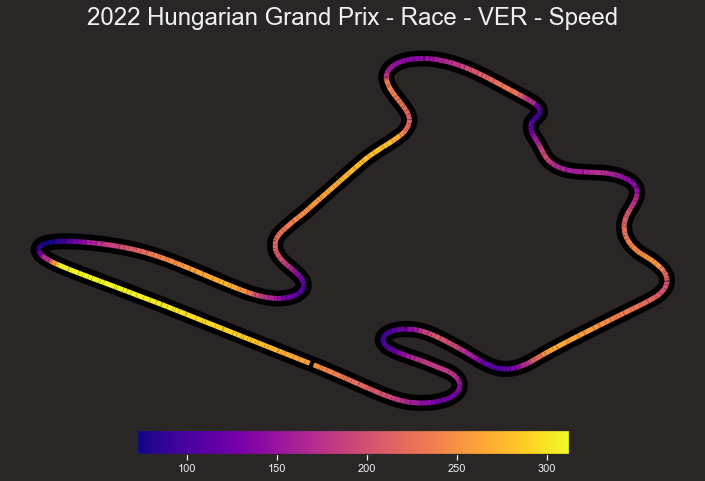

In [22]:
driver_speed_change("VER", hungary_race)

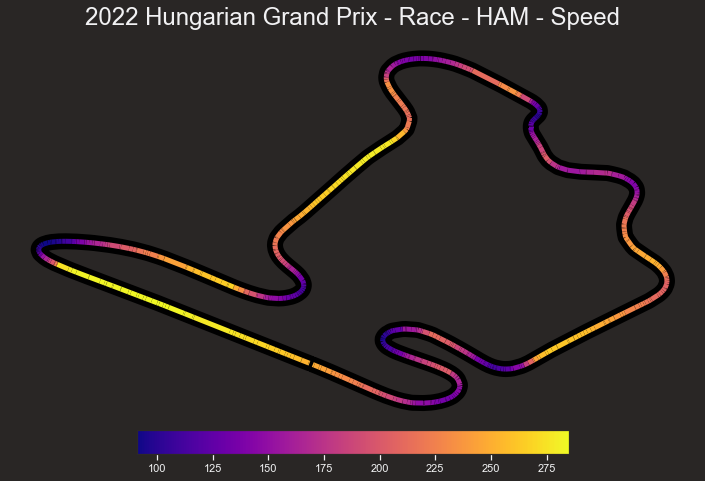

In [24]:
driver_speed_change("HAM", hungary_race)

In [19]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np
import pandas as pd

import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from timple.timedelta import strftimedelta

def new_fastest_lap_comparison(driverX, driverY, session):
    '''This gives you the fast lap telemtry data comparison between two drivers of interest'''
   

    driver_X = session.laps.pick_driver(driverX).pick_fastest()
    driver_Y = session.laps.pick_driver(driverY).pick_fastest()

    driver_X = driver_X.get_car_data().add_distance()
    driver_Y = driver_Y.get_car_data().add_distance()


    team_colors = list()
    for index, lap in session.laps.pick_driver(driverX).pick_fastest():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
    driverX_color = ff1.plotting.team_color("RBR")
    driverY_color = ff1.plotting.team_color("FER")

    fig, ax = plt.subplots()
    ax.plot(driver_X['Distance'], driver_X['Speed'], color=driverX_color, label=driverX)
    ax.plot(driver_Y['Distance'], driver_Y['Speed'], color=driverY_color, label=driverY)

    ax.set_xlabel('Distance in m')
    ax.set_ylabel('Speed in km/h')

    ax.legend()
    plt.suptitle(f"Fastest Lap Comparison \n "
                f"{session.event['EventName']} {session.event.year} {session.name}")

    plt.show()

In [20]:
new_fastest_lap_comparison("LEC", "SAI", hungary_race)

TypeError: cannot unpack non-iterable Timedelta object

In [37]:
from F1_aws_plot import get_driver_aws_data

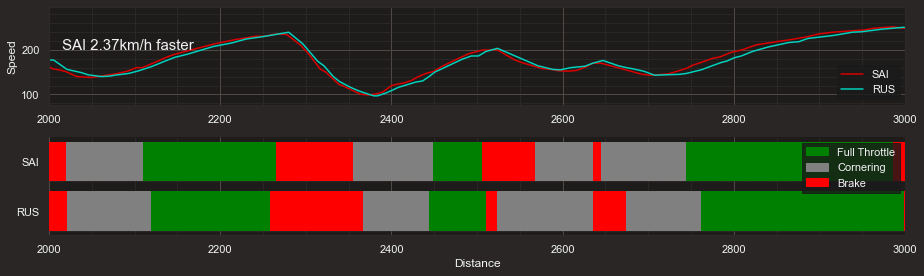

In [38]:
get_driver_aws_data("SAI","RUS", 2000,3000, hungary_race)